# Bent IC and Text Detection

In [1]:
from matplotlib import pyplot as plt
from PIL import Image
from detector import Detector
import os
from DataAugmentator import get_boxes, read_boxes, overlay_good_pins
%matplotlib inline

Number of bent pins in file: 2


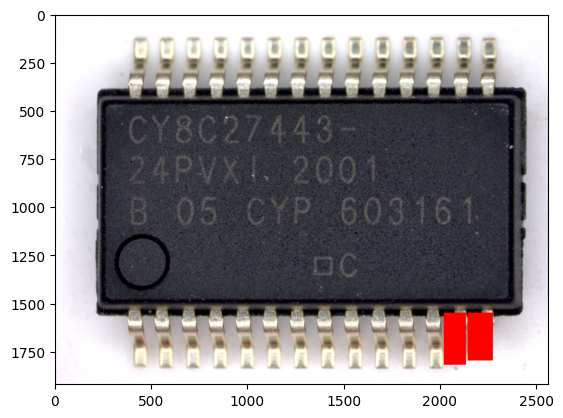


0: 608x800 1 bent, 27 okays, 1 package, 1 text, 147.2ms
Speed: 5.0ms preprocess, 147.2ms inference, 62.3ms postprocess per image at shape (1, 3, 608, 800)
### detector.py: It took 2.1269302368164062 seconds to execute!


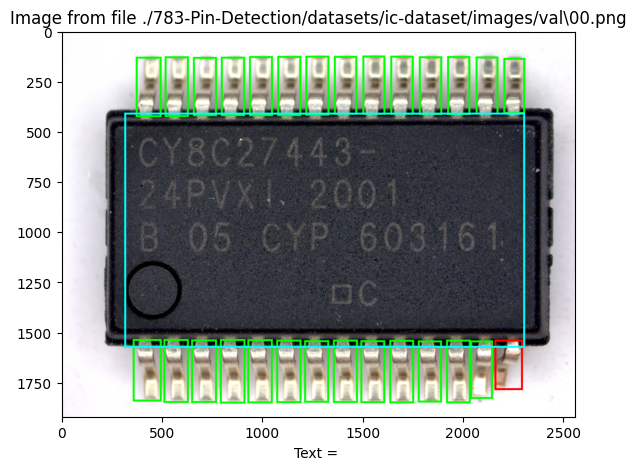

Number of bent pins in file: 0


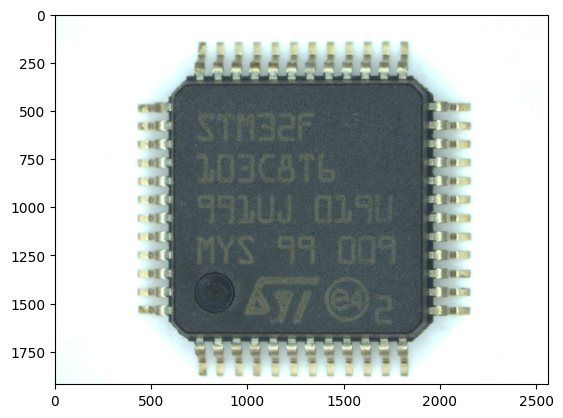


0: 608x800 48 okays, 1 package, 23.0ms
Speed: 4.0ms preprocess, 23.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)
### detector.py: It took 0.5936017036437988 seconds to execute!


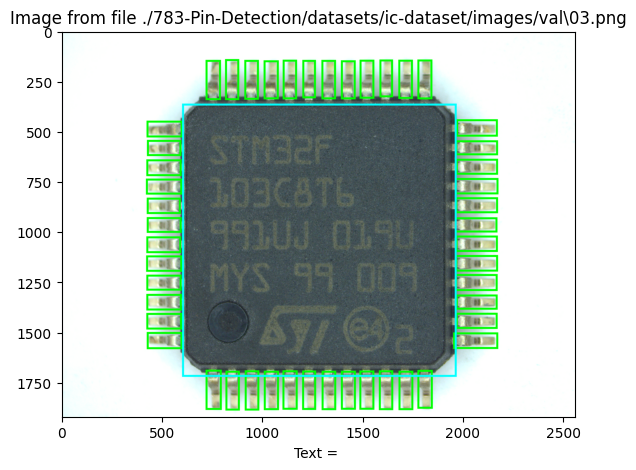

Number of bent pins in file: 3


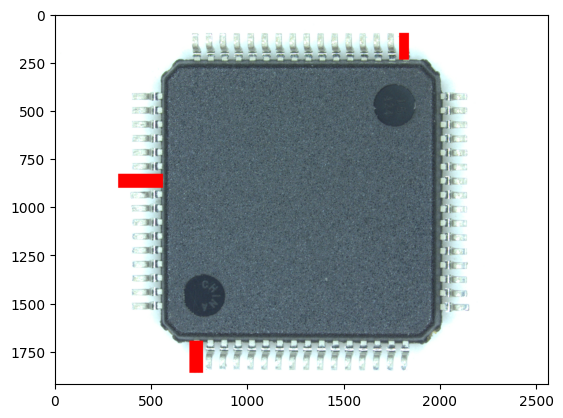


0: 608x800 3 bents, 63 okays, 1 package, 2 texts, 20.5ms
Speed: 7.0ms preprocess, 20.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)
### detector.py: It took 0.61279296875 seconds to execute!


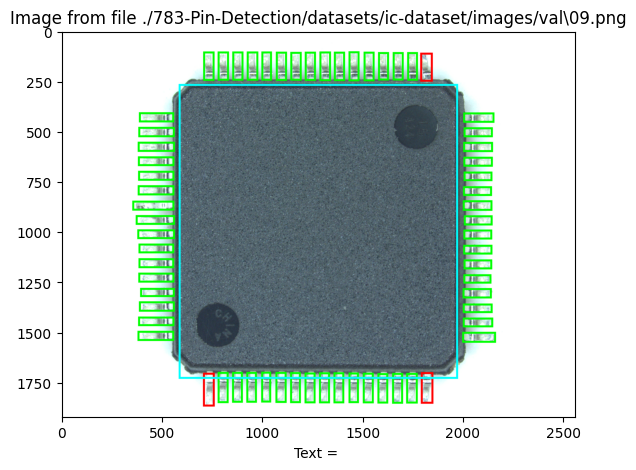

Number of bent pins in file: 0


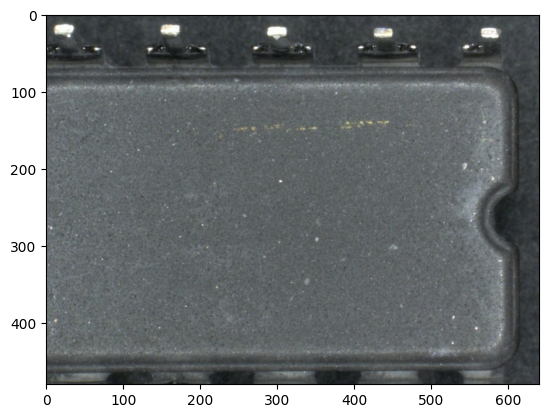


0: 608x800 12 okays, 1 package, 19.0ms
Speed: 3.0ms preprocess, 19.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)
### detector.py: It took 0.4438745975494385 seconds to execute!


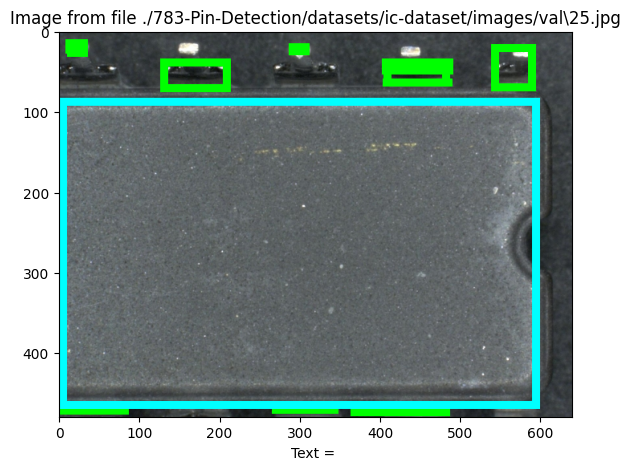

Number of bent pins in file: 0


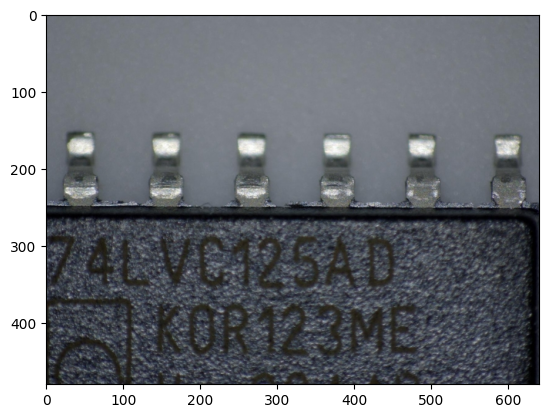


0: 608x800 6 okays, 1 package, 19.0ms
Speed: 4.0ms preprocess, 19.0ms inference, 3.0ms postprocess per image at shape (1, 3, 608, 800)
### detector.py: It took 0.4721710681915283 seconds to execute!


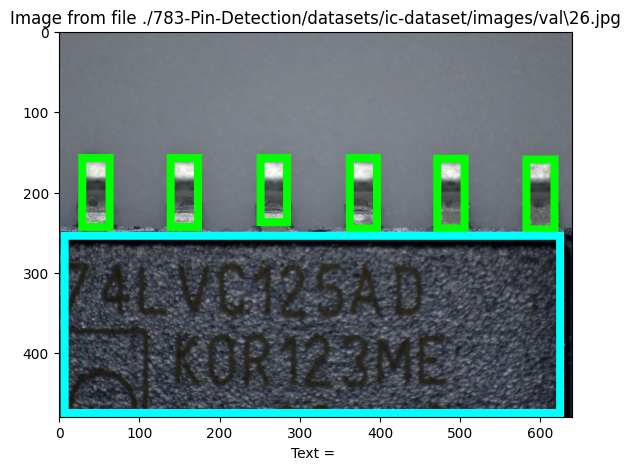

Number of bent pins in file: 0


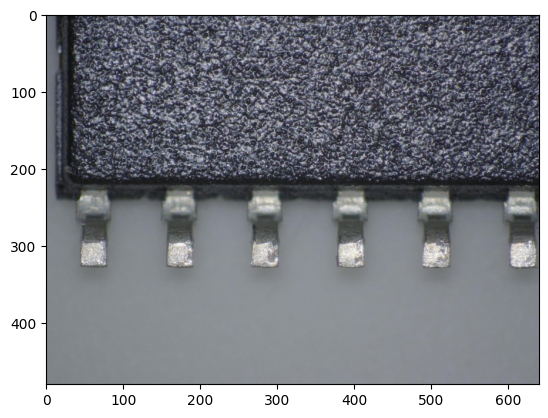


0: 608x800 6 okays, 1 package, 27.0ms
Speed: 6.5ms preprocess, 27.0ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)
### detector.py: It took 0.47634077072143555 seconds to execute!


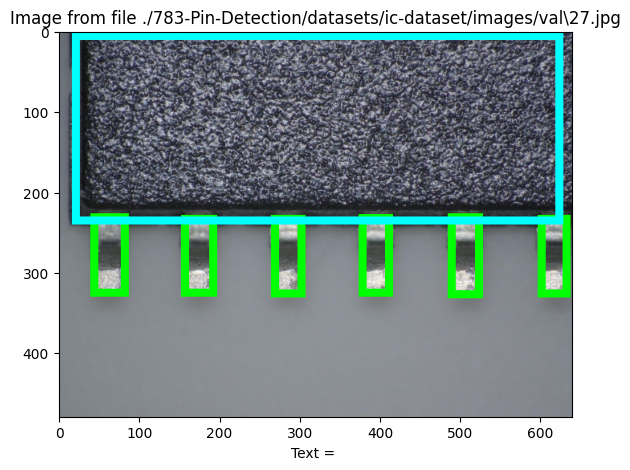

Number of bent pins in file: 0


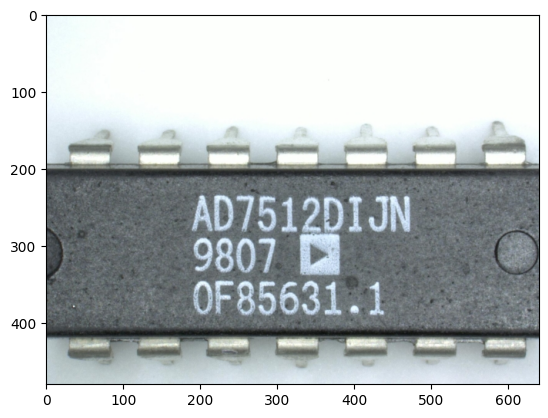


0: 608x800 1 bent, 15 okays, 1 package, 1 text, 78.8ms
Speed: 4.1ms preprocess, 78.8ms inference, 1.0ms postprocess per image at shape (1, 3, 608, 800)
### detector.py: It took 0.5893568992614746 seconds to execute!


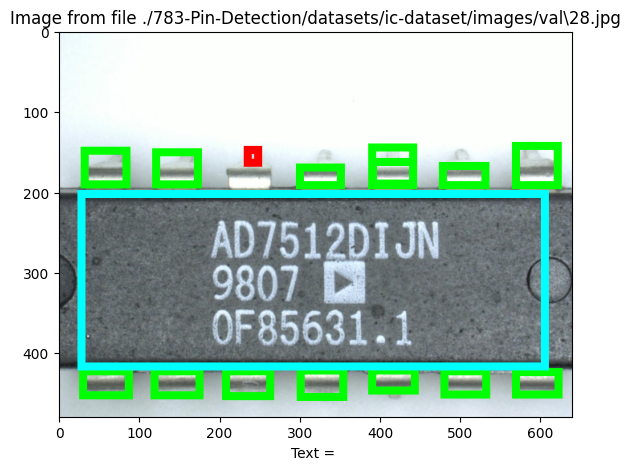

Number of bent pins in file: 19


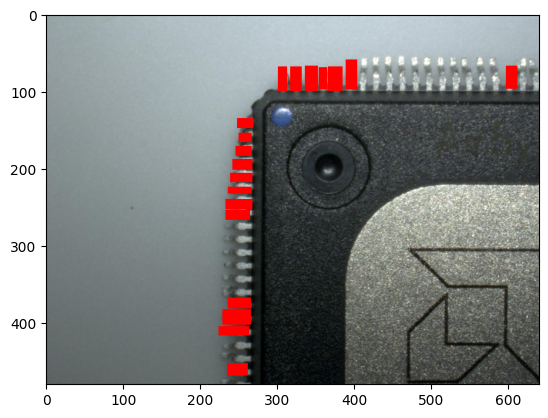


0: 608x800 28 bents, 20 okays, 1 package, 24.5ms
Speed: 4.0ms preprocess, 24.5ms inference, 2.0ms postprocess per image at shape (1, 3, 608, 800)
### detector.py: It took 0.5816304683685303 seconds to execute!


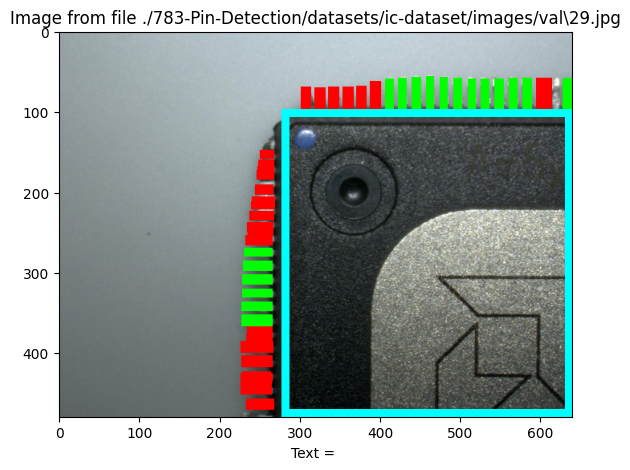

In [4]:
de = Detector()
de.add_to_command_tree('-no-text', [])
de.add_to_command_tree('-show', [])
de.add_to_command_tree('-overlay-good-pin', ['c1'])
de.add_to_command_tree('-overlay-bent-pin', ['c0'])
de.add_to_command_tree('-overlay-package', ['c5'])
de.add_to_command_tree('-model-n', [65])

input_image_folder  = './783-Pin-Detection/datasets/ic-dataset/images/val'
input_label_folder  ='./783-Pin-Detection/datasets/ic-dataset/labels/val'

image_files = [f for f in os.listdir(input_image_folder) if f.endswith(('.png', '.jpg'))]

for i, image_file in enumerate(image_files):
    image_path = os.path.join(input_image_folder, image_file)
    image = Image.open(image_path).convert('RGB')
    image_width, image_height = image.size

    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(input_label_folder, label_file)
    boxes = get_boxes(read_boxes(label_path), cl=0)


    print(f'Number of bent pins in file: {len(boxes)}')
    compare_image = overlay_good_pins(image, boxes)
    plt.imshow(compare_image)
    plt.show()

    de.execute(image_path)
